# Text Classification: Name Gender

Here is a partition of the name gender data into training, dev-test, and test data as shown in the lectures:

In [11]:
import nltk
nltk.download('names')
from nltk.corpus import names
m = names.words('male.txt')
f = names.words('female.txt')

[nltk_data] Downloading package names to /Users/jakob/nltk_data...
[nltk_data]   Package names is already up-to-date!


In [26]:
# print(names.words('male.txt')[:10])
print(([(name, 'male') for name in m] +
         [(name, 'female') for name in f])[-10:])

[('Zonnya', 'female'), ('Zora', 'female'), ('Zorah', 'female'), ('Zorana', 'female'), ('Zorina', 'female'), ('Zorine', 'female'), ('Zsa Zsa', 'female'), ('Zsazsa', 'female'), ('Zulema', 'female'), ('Zuzana', 'female')]


In [23]:
import random
random.seed(1234) # Set the random seed to allow replicability
names = ([(name, 'male') for name in m] +
         [(name, 'female') for name in f])
random.shuffle(names)
train_names = names[1000:]
devtest_names = names[500:1000]
test_names = names[:500]

7944


And here is one of the classifiers given in the lectures.

In [63]:
def gender_features2(word):
    return {'suffix1': word[-1:],
            'suffix2': word[-2:]}

train_set2 = [(gender_features2(n), g) for n, g in train_names]
devtest_set2 = [(gender_features2(n), g) for n, g in devtest_names]

classifier2 = nltk.NaiveBayesClassifier.train(train_set2)

acc=nltk.classify.accuracy(classifier2,devtest_set2)
print("Accuracy %f" % acc)

cmatrix2=nltk.ConfusionMatrix([classifier2.classify(n) for (n,g) in devtest_set2],
[g for (n,g) in devtest_set2])
print(cmatrix2.evaluate())

Accuracy 0.770000
   Tag | Prec.  | Recall | F-measure
-------+--------+--------+-----------
female | 0.8056 | 0.8290 | 0.8172
  male | 0.7072 | 0.6737 | 0.6900



### Exercise: Using more information
Define a new function `gender_features5` that takes, as features, any suffixes of size 1, 2, 3, 4, and 5. Examine the accuracy results. What can you conclude from this new classifier?

In [67]:
def gender_features5(word):
    return {'suffix1': word[-1:],'suffix2': word[-2:],'suffix3': word[-3:],
    'suffix4': word[-4:],'suffix5': word[-5:]}

# training & devtest set
train_set5 =[(gender_features5(n), g) for n, g in train_names]
devtest_set5 = [(gender_features5(n), g) for n, g in devtest_names]
classifier5= nltk.NaiveBayesClassifier.train(train_set5)
acc=nltk.classify.accuracy(classifier5, devtest_set5)
print("Accuracy %f" % acc)
cmatrix5=nltk.ConfusionMatrix([classifier5.classify(n) for (n,g) in devtest_set5],
[g for (n,g) in devtest_set5])
print(cmatrix5.evaluate())



Accuracy 0.802000
   Tag | Prec.  | Recall | F-measure
-------+--------+--------+-----------
female | 0.8025 | 0.8767 | 0.8380
  male | 0.8011 | 0.6971 | 0.7455



In [61]:
def gender_features3_5(word):
    return {'suffix3': word[-3:],
    'suffix4': word[-4:],'suffix5': word[-5:]}

# training & devtest set
train_set3_5 =[(gender_features3_5(n), g) for n, g in train_names]
devtest_set3_5 = [(gender_features3_5(n), g) for n, g in devtest_names]
classifier3_5= nltk.NaiveBayesClassifier.train(train_set3_5)
acc=nltk.classify.accuracy(classifier5, devtest_set3_5)
print("Accuracy %f" % acc)
cmatrix3_5=nltk.ConfusionMatrix([classifier3_5.classify(n) for (n,g) in devtest_set3_5],
[g for (n,g) in devtest_set3_5])
print(cmatrix3_5.evaluate())

Accuracy 0.786000
   Tag | Prec.  | Recall | F-measure
-------+--------+--------+-----------
female | 0.7649 | 0.8841 | 0.8202
  male | 0.8232 | 0.6652 | 0.7358



### Exercise: Plot the impact of the training size on our classifier

The following code plots the classifier accuracy on the training and dev-test set as we increase the training size on the classifier we used in the. Examine the plot and answer the following questions:

1. From what amount of training data you would judge that the system stops over-fitting?
2. From what amount of training data would you say that there is no need to add more training data?

In [64]:
train_accuracy2 = []
devtest_accuracy2 = []
nsamples = range(10, 500, 5)
for n in nsamples:
    classifier2 = nltk.NaiveBayesClassifier.train(train_set2[:n])
    train_accuracy2.append(nltk.classify.accuracy(classifier2, train_set2[:n]))
    devtest_accuracy2.append(nltk.classify.accuracy(classifier2, devtest_set2))

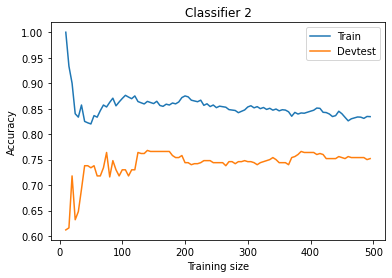

In [65]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(nsamples, train_accuracy2, label='Train')
plt.plot(nsamples, devtest_accuracy2, label='Devtest')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Classifier 2')
plt.legend()

### Exercise: Plot the impact of the training size on your classifier

Make the same plot, this time using the classifier that uses the feature extractor that you have designed. Compare your plot against the one in the above exercise.

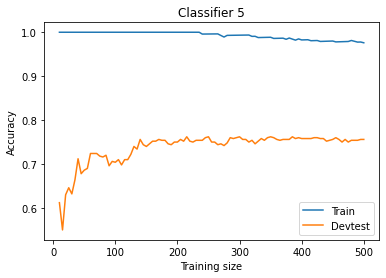

In [70]:
train_accuracy5 = []
devtest_accuracy5 = []
nsamples = range(10, 505, 5)
for n in nsamples:
    classifier5 = nltk.NaiveBayesClassifier.train(train_set5[:n])
    train_accuracy5.append(nltk.classify.accuracy(classifier5, train_set5[:n]))
    devtest_accuracy5.append(nltk.classify.accuracy(classifier5, devtest_set5))

plt.plot(nsamples, train_accuracy5, label='Train')
plt.plot(nsamples, devtest_accuracy5, label='Devtest')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Classifier 5')
plt.legend()

### Exercise: Repeat the analysis using sk-learn

The lectures show how to use sklearn to implement the name classifier. Replicate the work in this workshop and try to answer the same questions as above.

1. Is it better to use the last two characters, or the last 5 characters?
2. From what amount of training data you would judge that the system stops overfitting?
3. From what amount of training data would you say that there is no need to add more training data?


In [75]:
def one_hot_character(c):
    alphabet = 'abcdefghijklmnopqrstuvwxyz'
    result= [0]*(len(alphabet)+1)
    i = alphabet.find(c.lower())
    if i>=0:
        result[i] = 1
    else: result[len(alphabet)] = 1

    return result

def sk_gender_features2(word):

    assert len(word) >= 2

    last = one_hot_character(word[-1])
    second_last = one_hot_character(word[-2])
    return second_last + last

print(gender_features2("Jakob"))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [80]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
sk_train_set2= [(sk_gender_features2(n),g) for n,g in train_names]
sk_devtest_set2= [(sk_gender_features2(n),g) for n,g in devtest_names]

sk_classifier = MultinomialNB()

train_x,train_y = zip(*sks_train_set2)
devtest_x,devtest_y = zip(*sk_devtest_set2)

sk_classifier.fit(train_x,train_y)

test_accuracy=accuracy_score(devtest_y,sk_classifier.predict(devtest_x))
print(test_accuracy)


0.752


In [58]:


def one_hot_character(c):
    alphabet = 'abcdefghijklmnopqrstuvwxyz'
    result= [0]*(len(alphabet)+1)
    i = alphabet.find(c.lower())
    if i>=0:
        result[i] = 1
    else: result[len(alphabet)] = 1

    return result

def gender_features2(word):

    assert len(word) >= 2

    last = one_hot_character(word[-1])
    second_last = one_hot_character
    return  [ord(word[-n]) for n in range()]

def run_classifier(suffixes):
    train_set=[(gender_features(n,suffixes),g) for (n,g) in train_names]
    print(train_set[:10])
    devtest_set=[(gender_features(n,suffixes),g) for (n,g) in devtest_names]

    train_x,train_y = zip(*train_set)

    print(train_x[:10])
    print(train_y[:10])
    devtest_x,devtest_y=zip(*devtest_set)

    classifier=MultinomialNB()

    classifier.fit(X=train_x,y=train_y)

    train_y_pred=classifier.predict(train_x)
    devtest_y_pred=classifier.predict(devtest_x)

    train_accuracy=accuracy_score(train_y,train_y_pred)
    devtest_accuracy=accuracy_score(devtest_y,devtest_y_pred)

    print("Classifer Model Performance with %i Suffixes:" % suffixes)
    print("Train Accuracy: %f" % train_accuracy)
    print("DevTest Accuracy: %f" % devtest_accuracy)
    ord()

run_classifier(2)
run_classifier(5)




[(['na'], 'female'), (['us'], 'male'), (['me'], 'male'), (['ny'], 'female'), (['ah'], 'female'), (['au'], 'male'), (['ia'], 'female'), (['ry'], 'male'), (['ie'], 'female'), (['ea'], 'female')]
(['na'], ['us'], ['me'], ['ny'], ['ah'], ['au'], ['ia'], ['ry'], ['ie'], ['ea'])
('female', 'male', 'male', 'female', 'female', 'male', 'female', 'male', 'female', 'female')


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(


ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'